Data Set: Traffic Data in Pittsburgh
Link: https://data.wprdc.org/dataset/traffic-count-data-city-of-pittsburgh/resource/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167

Utlizing the traffic count in different neighborhoods, we can determine the neighborhoods with the greatest and least amounts of traffic. For the sake of scoring a neighborhood as "best", a lower recorded traffic count will be considered better, as less car traffic indicates a better neighborhood for living with less cars meaning less noise, car pollution, and safer street for childen to play near. 

{'Polish Hill': 15894.0, 'Squirrel Hill South': 79302.0, 'Central Northside': 5945.0, 'Bluff': 5365.0, 'Crafton Heights': 11500.0, 'Shadyside': 66132.0, 'Highland Park': 23471.0, 'North Shore': 10350.0, 'East Liberty': 51247.0, 'Mount Washington': 47336.0, 'Brookline': 39144.0, 'Squirrel Hill North': 35452.0, 'Bloomfield': 43101.0, 'Larimer': 37713.0, 'Friendship': 4887.0, 'Point Breeze': 31242.0, 'Regent Square': 16729.0, 'Central Lawrenceville': 13499.0, 'Knoxville': 7646.0, 'Central Oakland': 11306.0, 'Strip District': 29075.0, 'Greenfield': 7158.0, 'Windgap': 3062.0, 'Beechview': 4255.0, 'Upper Hill': 2860.0, 'Stanton Heights': 16272.0, 'Manchester': 21293.0, 'South Side Slopes': 26447.0, 'Perry North': 19114.0, 'North Oakland': 23821.0, 'East Hills': 16253.0, 'Duquesne Heights': 5831.0, 'Sheraden': 8532.0, 'Morningside': 14345.0, 'Central Business District': 2305.0, 'St. Clair': 2436.0, 'Perry South': 12075.0, 'Elliott': 4028.0, 'Carrick': 13787.0, 'Westwood': 15400.0, 'Allegheny 

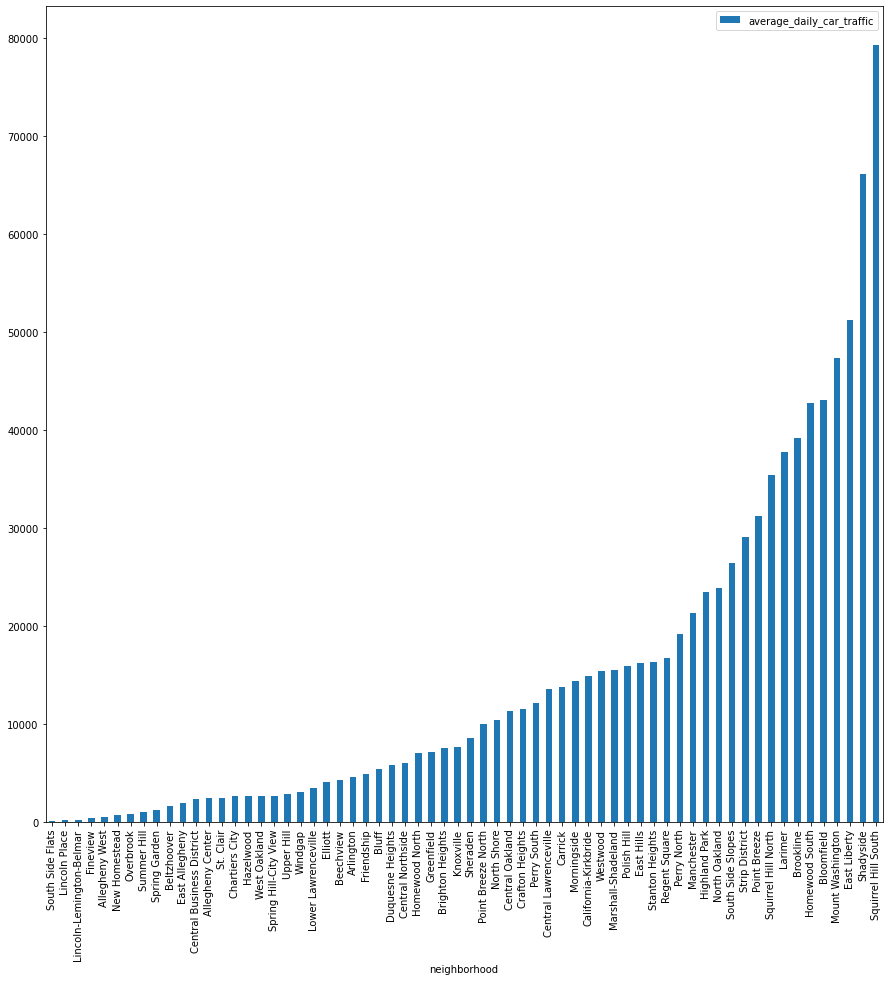

In [73]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

trafRaw = pd.read_csv("PittTraffic.csv")
trafRaw.head()
traf = trafRaw[trafRaw['average_daily_car_traffic'].notna()]

neighborhoods = dict()
i = 0
for name in traf.iloc[:, 18]:
    if name not in neighborhoods:
        if traf.iat[i, 6]!= 0:
            neighborhoods[name] = traf.iat[i, 6]
            #print("here\n")
        else: 
            neighborhoods[name] = 0
            #print("or here\n")
    else:
        if traf.iat[i, 6]!= 0:
            neighborhoods[name] += traf.iat[i, 6]
            #print("or maybe\n")
        else:
            neighborhoods[name] += 0
            #print("pls here\n")
    i += 1
print(neighborhoods)

num_cars = traf.groupby("neighborhood").sum()['average_daily_car_traffic']
num_cars = pd.DataFrame(num_cars)
num_cars = num_cars.sort_values('average_daily_car_traffic', ascending=True)
num_cars.plot.bar(figsize=(15,15))

This graph indicates that the neighborhoods with the lowest average amount of cars every day are South Side Flats, Lincoln Place, and Lincoln-Lemington-Belmar. On the opposite end, Squirrel Hill South, Shadyside, and East Liberty all have the most average cars per day. This makes South Side Flats, Lincoln Place, and Lincoln-Lemington-Belmar the best places to live, with Squirrel Hill South, Shadyside, and East Liberty being the worst. 